In [42]:
import sys

sys.path.insert(1, 'C:/Users/peter/Desktop/volatility-forecasting/midas')

from base import BaseModel
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from datetime import datetime
from volatility import MIDAS
import time

%matplotlib inline

plt.style.use('bmh')

In [2]:
def create_plot(series, name):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(name)

    sns.lineplot(ax = ax[0], x = series.index, y = series.values, color = 'b')
    ax[0].set_title("Time series's of data")
    ax[0].set_xlabel('Date')

    sns.distplot(series, color='g', bins=100, hist_kws={'alpha': 0.4}, ax = ax[1])
    ax[1].set_title("Histogram's of data")
    return

In [3]:
baa = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/BAA10Y_monthly.csv')
baa.iloc[:, 0] = baa.iloc[:, 0].astype('datetime64[ms]')
baa.set_index(baa.iloc[:, 0], drop = True, inplace = True)
baa = baa.iloc[:, 1]
#baa = np.log(baa).diff().fillna(0)
baa = baa[(baa.index >= datetime(1999, 3, 1)) & (baa.index <= datetime(2020, 11, 1))]
print(baa.describe())

count    261.000000
mean       2.605462
std        0.732416
min        1.553000
25%        2.115455
50%        2.564091
75%        2.958636
max        6.008696
Name: BAA10Y, dtype: float64


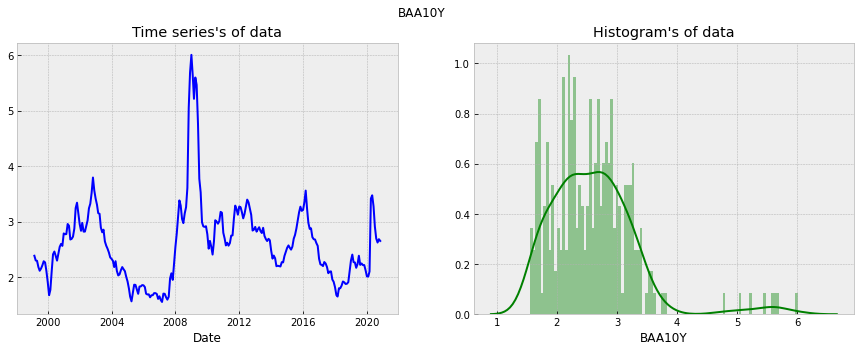

In [4]:
create_plot(baa, 'BAA10Y')

In [5]:
dtb = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/DTB3_monthly.csv')
dtb.iloc[:, 0] = dtb.iloc[:, 0].astype('datetime64[ms]')
dtb.set_index(dtb.iloc[:, 0], drop = True, inplace = True)
dtb = dtb.iloc[:, 1]
#dtb = dtb.diff().fillna(0)
dtb = dtb[(dtb.index >= datetime(1999, 3, 1)) & (dtb.index <= datetime(2020, 11, 1))]
print(dtb.describe())

count    261.000000
mean       1.711552
std        1.830535
min        0.011429
25%        0.123333
50%        1.130952
75%        2.738636
max        6.171905
Name: DTB3, dtype: float64


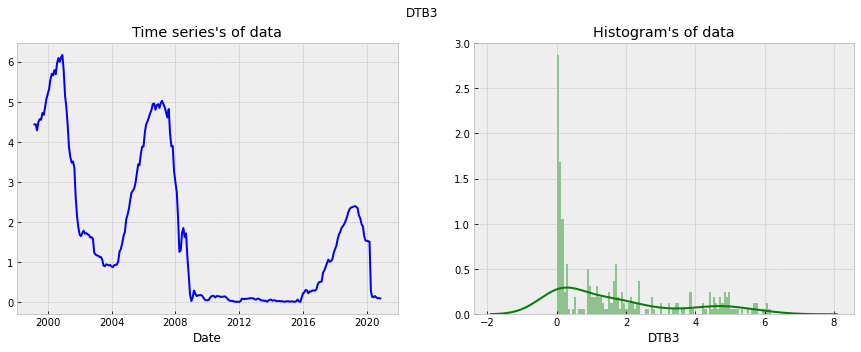

In [6]:
create_plot(dtb, 'DTB3')

In [7]:
dsg = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/DGS10_monthly.csv')
dsg.iloc[:, 0] = dsg.iloc[:, 0].astype('datetime64[ms]')
dsg.set_index(dsg.iloc[:, 0], drop = True, inplace = True)
dsg = dsg.iloc[:, 1]
#dsg = dsg.diff().fillna(0)
dsg = dsg[(dsg.index >= datetime(1999, 3, 1)) & (dsg.index <= datetime(2020, 11, 1))]
print(dsg.describe())

count    261.000000
mean       3.430947
std        1.373532
min        0.623636
25%        2.303043
50%        3.401905
75%        4.521579
max        6.661000
Name: DGS10, dtype: float64


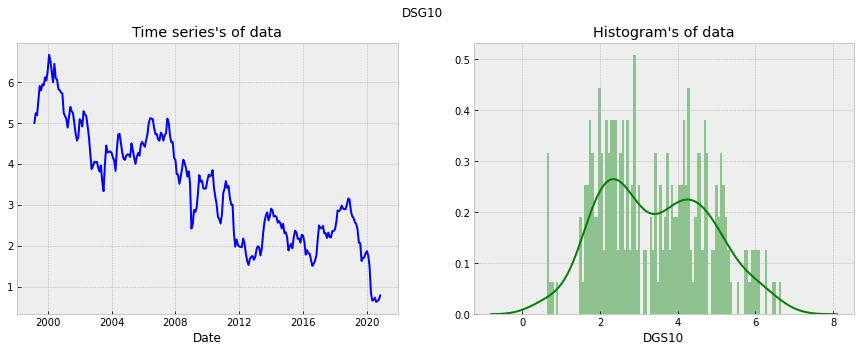

In [8]:
create_plot(dsg, 'DSG10')

In [9]:
wti = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/DCOILWTICO_monthly.csv')
wti.iloc[:, 0] = wti.iloc[:, 0].astype('datetime64[ms]')
wti.set_index(wti.iloc[:, 0], drop = True, inplace = True)
wti = wti.iloc[:, 1]
wti = np.log(wti).diff().fillna(0)
wti = wti[(wti.index >= datetime(1999, 3, 1)) & (wti.index <= datetime(2020, 11, 1))]
print(wti.describe())

count    261.000000
mean       0.004444
std        0.106279
min       -0.568191
25%       -0.043879
50%        0.016665
75%        0.061141
max        0.545852
Name: DCOILWTICO, dtype: float64


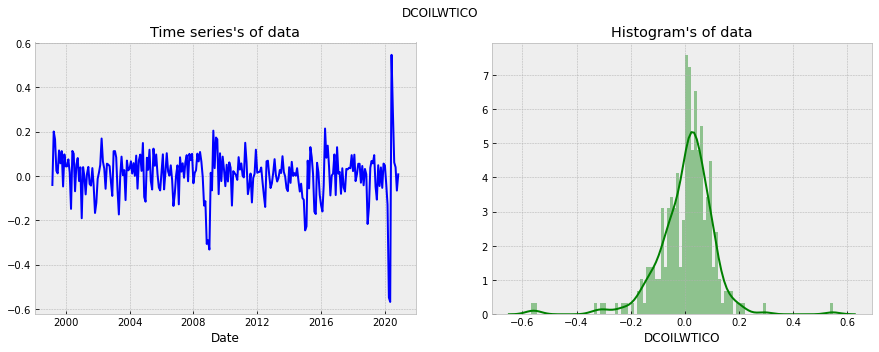

In [10]:
create_plot(wti, 'DCOILWTICO')

In [11]:
eff = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/EFFR_monthly.csv')
eff.iloc[:, 0] = eff.iloc[:, 0].astype('datetime64[ms]')
eff.set_index(eff.iloc[:, 0], drop = True, inplace = True)
eff = eff.iloc[:, 1]
#eff = eff.diff().fillna(0)
eff = eff[(eff.index >= datetime(1999, 3, 1)) & (eff.index <= datetime(2020, 11, 1))]
print(eff.describe())

count    244.000000
mean       1.627102
std        1.801660
min        0.048636
25%        0.145952
50%        1.019318
75%        2.314750
max        6.523333
Name: EFFR, dtype: float64


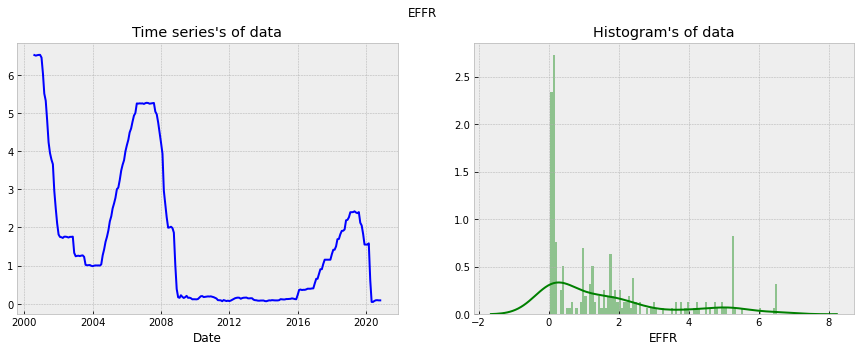

In [12]:
create_plot(eff, 'EFFR')

In [13]:
nfc = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/NFCI_monthly.csv')
nfc.iloc[:, 0] = nfc.iloc[:, 0].astype('datetime64[ms]')
nfc.set_index(nfc.iloc[:, 0], drop = True, inplace = True)
nfc = nfc.iloc[:, 1]
#nfc = nfc.diff().fillna(0)
nfc = nfc[(nfc.index >= datetime(1999, 3, 1)) & (nfc.index <= datetime(2020, 11, 1))]
print(nfc.describe())

count    261.000000
mean      -0.341050
std        0.530193
min       -0.803402
25%       -0.630552
50%       -0.494010
75%       -0.272038
max        2.674955
Name: NFCI, dtype: float64


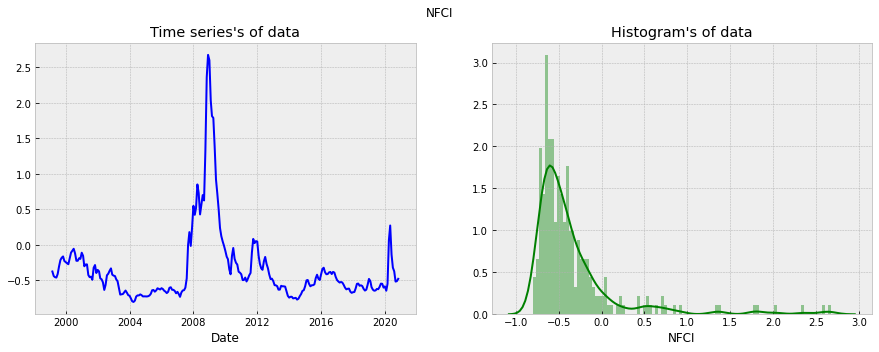

In [14]:
create_plot(nfc, 'NFCI')

In [15]:
vix = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/VIXCLS_monthly.csv')
vix.iloc[:, 0] = vix.iloc[:, 0].astype('datetime64[ms]')
vix.set_index(vix.iloc[:, 0], drop = True, inplace = True)
vix = vix.iloc[:, 1]
#vix = np.log(vix).diff().fillna(0)
vix = vix[(vix.index >= datetime(1999, 3, 1)) & (vix.index <= datetime(2020, 11, 1))]
print(vix.describe())

count    261.000000
mean      20.077544
std        8.433181
min       10.125455
25%       14.073182
50%       17.926087
75%       23.878636
max       62.253500
Name: VIXCLS, dtype: float64


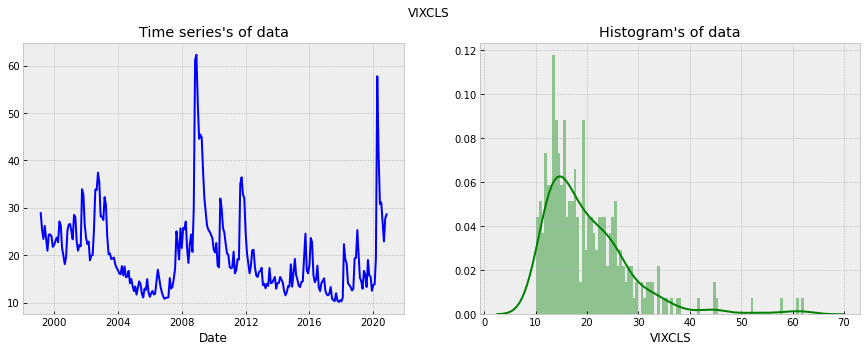

In [16]:
create_plot(vix, 'VIXCLS')

In [17]:
vxo = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/VXOCLS_monthly.csv')
vxo.iloc[:, 0] = vxo.iloc[:, 0].astype('datetime64[ms]')
vxo.set_index(vxo.iloc[:, 0], drop = True, inplace = True)
vxo = vxo.iloc[:, 1]
#vxo = np.log(vxo).diff().fillna(0)
vxo = vxo[(vxo.index >= datetime(1999, 3, 1)) & (vxo.index <= datetime(2020, 11, 1))]
print(vxo.describe())

count    261.000000
mean      20.391865
std        9.410766
min        8.020000
25%       13.583333
50%       17.940435
75%       24.760455
max       65.446522
Name: VXOCLS, dtype: float64


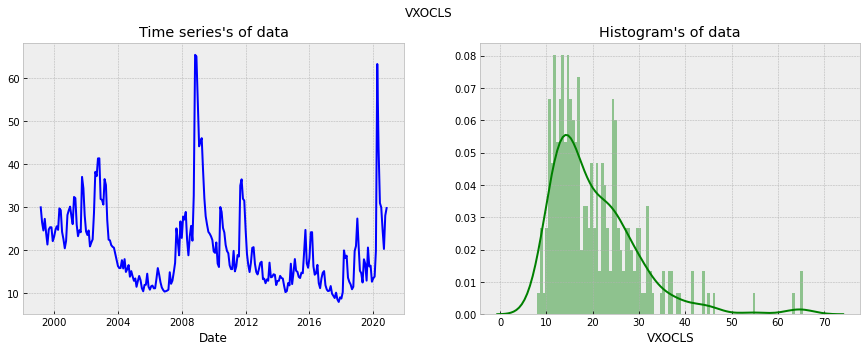

In [18]:
create_plot(vxo, 'VXOCLS')

In [19]:
cfnai = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/CFNAI.csv')
cfnai.DATE = pd.to_datetime(cfnai.DATE)
cfnai = cfnai.set_index(cfnai.DATE)
cfnai = cfnai.iloc[:, 1].shift(1)
#cfnai = (cfnai - cfnai.min()) /(cfnai.max() - cfnai.min())
cfnai = cfnai[(cfnai.index >= datetime(1999, 3, 1)) & (cfnai.index <= datetime(2020, 11, 1))]
print(cfnai.describe())

count    261.000000
mean      -0.138276
std        1.333573
min      -17.730000
25%       -0.310000
50%       -0.030000
75%        0.190000
max        5.960000
Name: CFNAI, dtype: float64


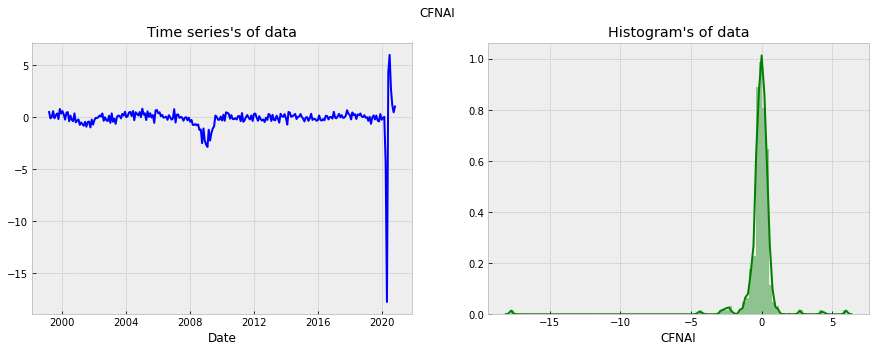

In [20]:
create_plot(cfnai, 'CFNAI')

In [21]:
cpi = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/CPIAUCSL.csv')
cpi['Inflation'] = (cpi.CPIAUCSL / cpi.CPIAUCSL.shift(1) - 1) * 100
cpi.DATE = pd.to_datetime(cpi.DATE)
cpi = cpi.set_index(cpi.DATE)
inf = cpi.iloc[:, 2].shift(1)
inf = inf[(inf.index >= datetime(1999, 3, 1)) & (inf.index <= datetime(2020, 11, 1))]
print(inf.describe())

count    261.000000
mean       0.176183
std        0.291286
min       -1.770548
25%        0.042993
50%        0.186925
75%        0.321447
max        1.376849
Name: Inflation, dtype: float64


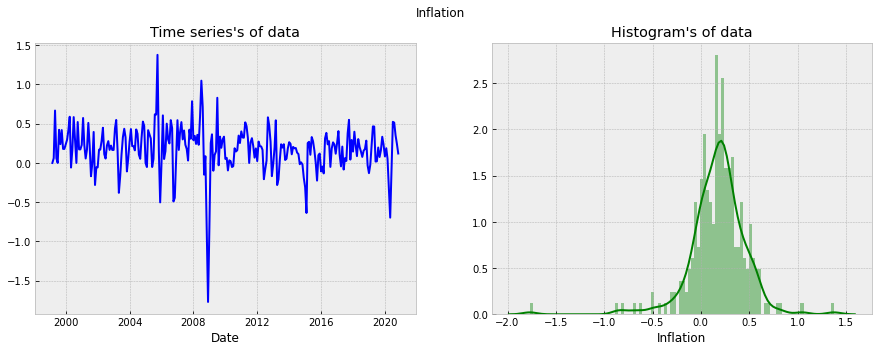

In [22]:
create_plot(inf, 'Inflation')

In [23]:
houst = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/HOUST.csv')
#houst.HOUST = (houst.HOUST - np.min(houst.HOUST))/(np.max(houst.HOUST) - np.min(houst.HOUST))
#houst.HOUST = (houst.HOUST / houst.HOUST.shift(1) - 1) * 100
houst.DATE = pd.to_datetime(houst.DATE)
houst = houst.set_index(houst.DATE)
houst = houst.iloc[:, 1].shift(1)
houst = np.log(houst).diff().fillna(0)
houst = houst[(houst.index >= datetime(1999, 3, 1)) & (houst.index <= datetime(2020, 11, 1))]
print(houst.describe())

count    261.000000
mean      -0.000510
std        0.083150
min       -0.306508
25%       -0.054463
50%        0.000789
75%        0.056425
max        0.214775
Name: HOUST, dtype: float64


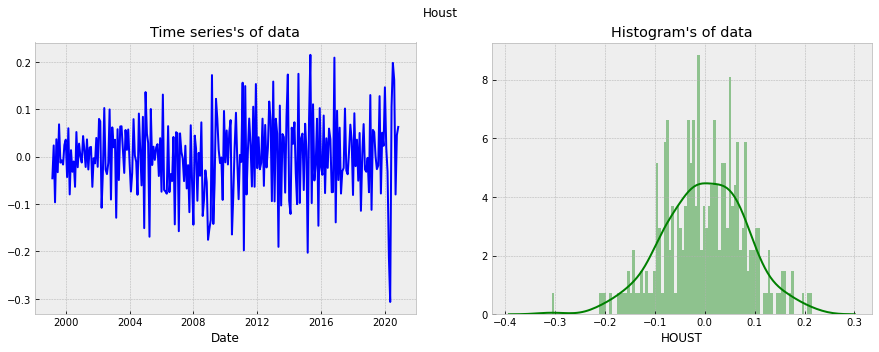

In [24]:
create_plot(houst, 'Houst')

In [25]:
ppi = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/PPIACO.csv')
ppi['PPI_change'] = (ppi.PPIACO / ppi.PPIACO.shift(1) - 1) * 100
ppi.DATE = pd.to_datetime(ppi.DATE)
ppi = ppi.set_index(ppi.DATE)
ppi = ppi.iloc[:, 2].shift(1)
ppi = ppi[(ppi.index >= datetime(1999, 3, 1)) & (ppi.index <= datetime(2020, 11, 1))]
print(ppi.describe())

count    261.000000
mean       0.186679
std        1.156950
min       -5.332656
25%       -0.313316
50%        0.272480
75%        0.831734
max        2.985856
Name: PPI_change, dtype: float64


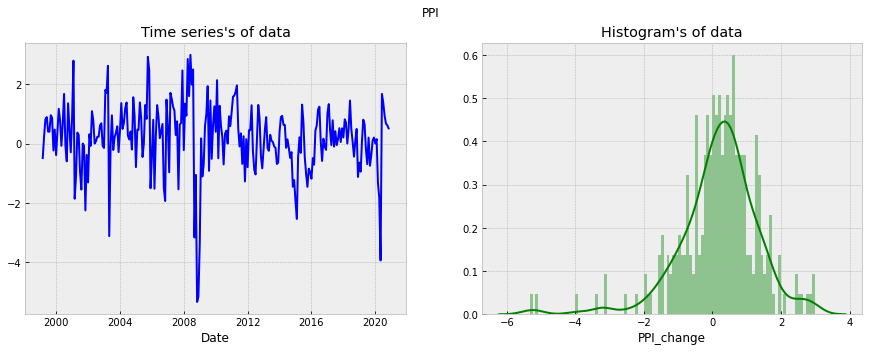

In [26]:
create_plot(ppi, 'PPI')

In [27]:
unrate = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/UNRATE.csv')
unrate.DATE = pd.to_datetime(unrate.DATE)
unrate = unrate.set_index(unrate.DATE)
unrate = unrate.iloc[:, 1].shift(1)
#unrate = np.log(unrate).diff().fillna(0)
unrate = unrate[(unrate.index >= datetime(1999, 3, 1)) & (unrate.index <= datetime(2020, 11, 1))]
print(unrate.describe())

count    261.000000
mean       5.906897
std        1.979013
min        3.500000
25%        4.400000
50%        5.400000
75%        6.900000
max       14.800000
Name: UNRATE, dtype: float64


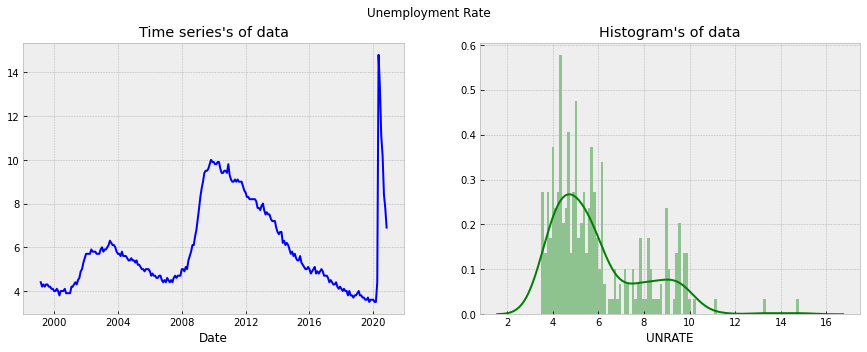

In [28]:
create_plot(unrate, 'Unemployment Rate')

In [29]:
ind = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/data/Macroeconomic/INDPRO.csv')
ind.DATE = pd.to_datetime(ind.DATE)
ind.set_index(ind.DATE, inplace = True)
ind = ind.iloc[:, 1].shift(1)
ind = np.log(ind).diff().fillna(0)
ind = ind[(ind.index >= datetime(1999, 3, 1)) & (ind.index <= datetime(2020, 11, 1))]
print(ind.describe())

count    261.000000
mean       0.000554
std        0.011909
min       -0.135622
25%       -0.002787
50%        0.001349
75%        0.005137
max        0.060489
Name: INDPRO, dtype: float64


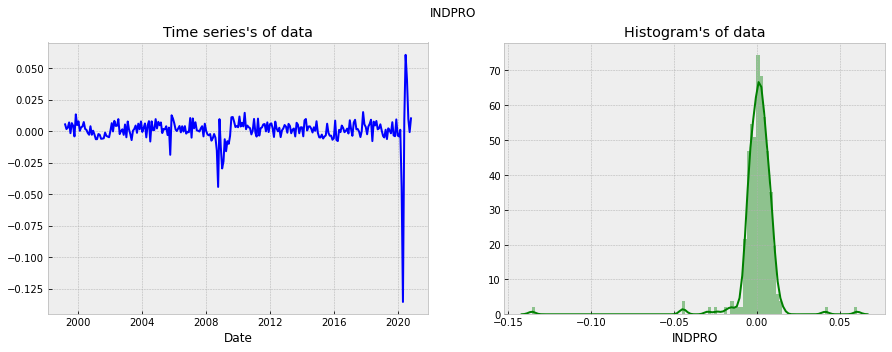

In [30]:
create_plot(ind, 'INDPRO')

In [31]:
#data = pd.concat([baa, cfnai, dtb, dsg, eff, houst, inf, nfc, ppi, unrate, vix, vxo, wti], axis = 1)
data = pd.concat([baa, cfnai, dtb, dsg, houst, inf, ind, nfc, ppi, unrate, vix, wti], axis = 1)

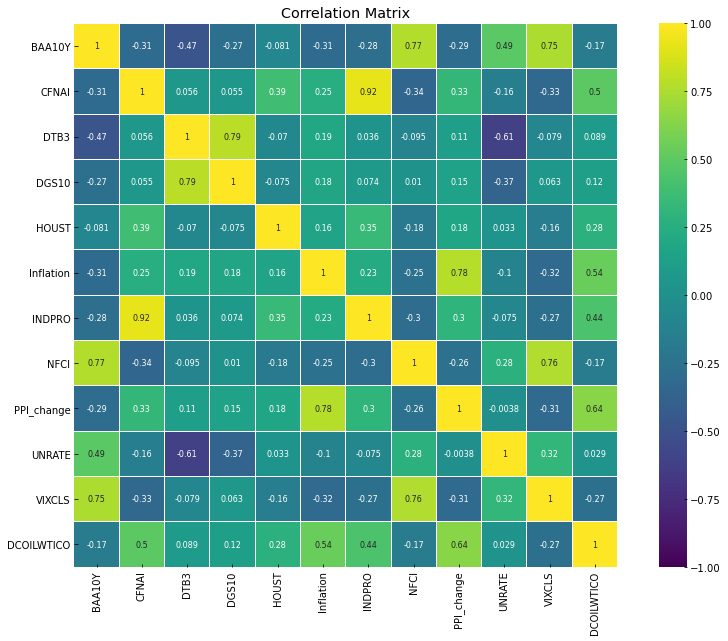

In [32]:
f, ax = plt.subplots(figsize=(15, 10))

ax = sns.heatmap(data.corr(), 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
ax.set_title('Correlation Matrix')
plt.show()

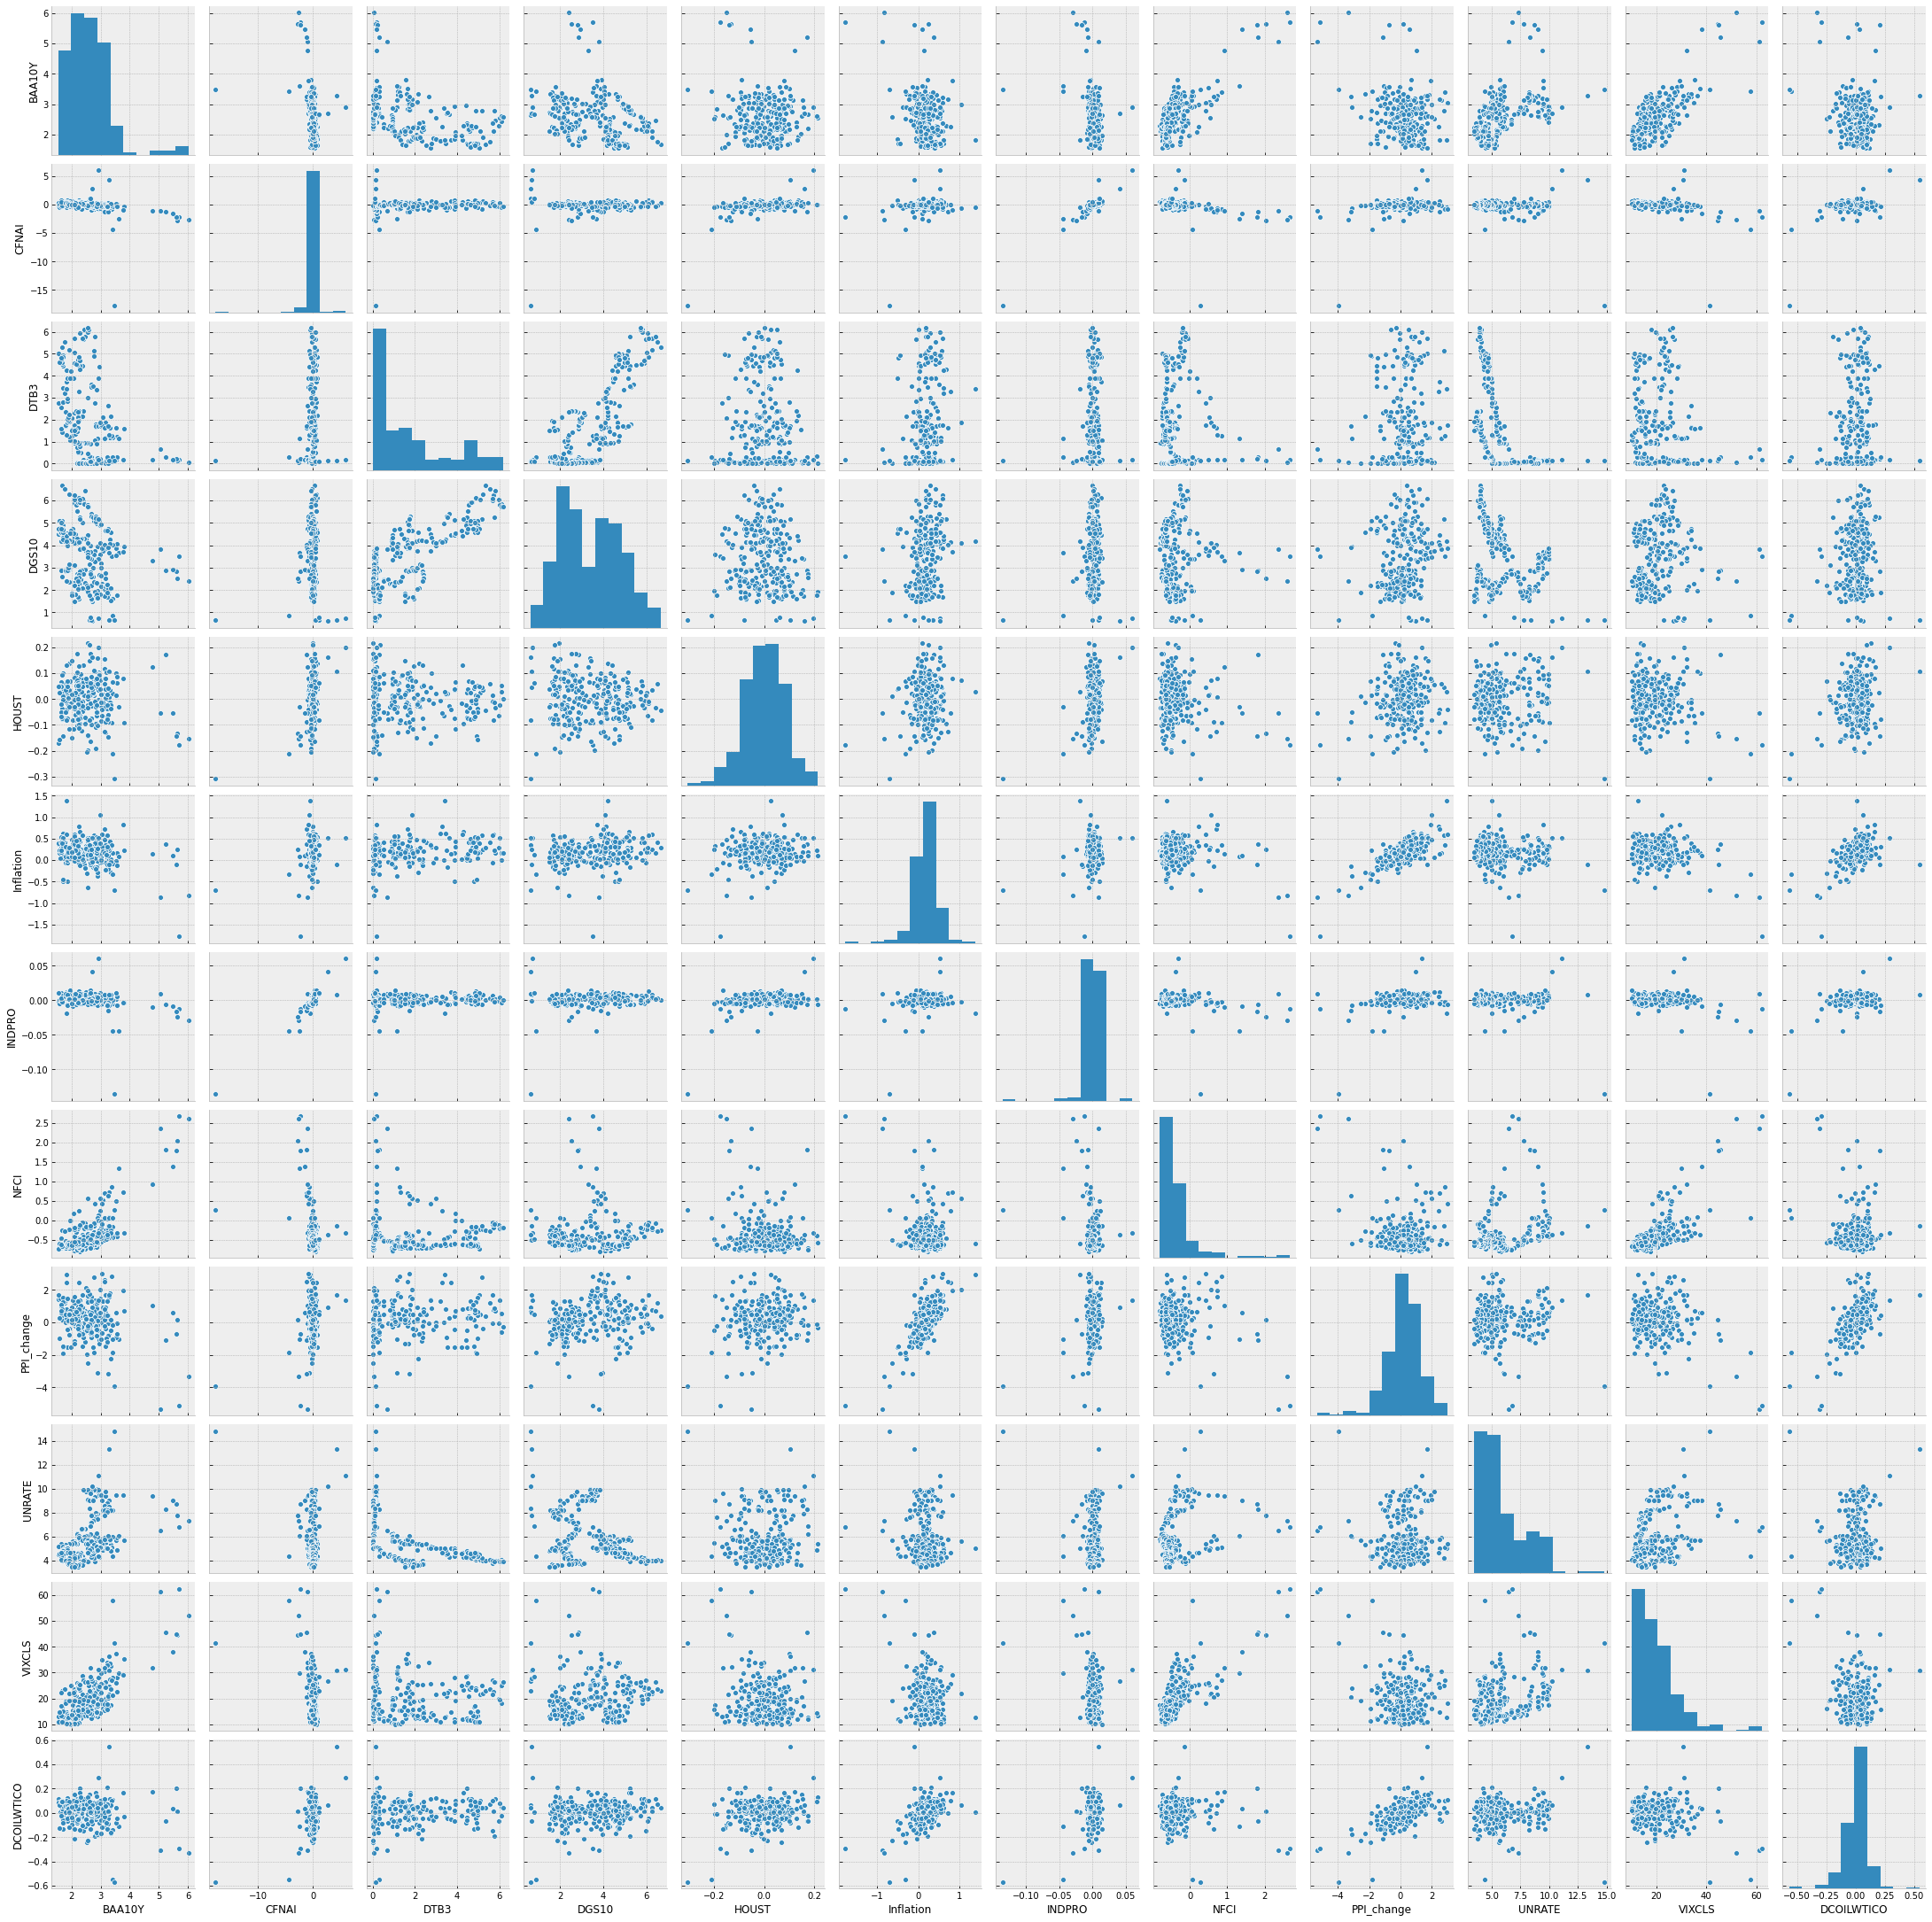

In [33]:
sns.pairplot(data)
plt.show()

In [34]:
display(data.describe())

,BAA10Y,CFNAI,DTB3,DGS10,HOUST,Inflation,INDPRO,NFCI,PPI_change,UNRATE,VIXCLS,DCOILWTICO
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2.605462,-0.138276,1.711552,3.430947,-0.000510,0.176183,0.000554,-0.341050,0.186679,5.906897,20.077544,0.004444
std,0.732416,1.333573,1.830535,1.373532,0.083150,0.291286,0.011909,0.530193,1.156950,1.979013,8.433181,0.106279
min,1.553000,-17.730000,0.011429,0.623636,-0.306508,-1.770548,-0.135622,-0.803402,-5.332656,3.500000,10.125455,-0.568191
25%,2.115455,-0.310000,0.123333,2.303043,-0.054463,0.042993,-0.002787,-0.630552,-0.313316,4.400000,14.073182,-0.043879
50%,2.564091,-0.030000,1.130952,3.401905,0.000789,0.186925,0.001349,-0.494010,0.272480,5.400000,17.926087,0.016665
75%,2.958636,0.190000,2.738636,4.521579,0.056425,0.321447,0.005137,-0.272038,0.831734,6.900000,23.878636,0.061141
max,6.008696,5.960000,6.171905,6.661000,0.214775,1.376849,0.060489,2.674955,2.985856,14.800000,62.253500,0.545852


In [35]:
data.tail()

,BAA10Y,CFNAI,DTB3,DGS10,HOUST,Inflation,INDPRO,NFCI,PPI_change,UNRATE,VIXCLS,DCOILWTICO
1999-03-01,2.386000,0.48,4.438421,4.998947,-0.045649,0.000000,0.005319,-0.374677,-0.488202,4.4,28.869500,-0.040861
1999-04-01,2.301304,-0.13,4.440870,5.232609,0.023670,0.060716,0.001585,-0.438790,0.245298,4.2,25.309565,0.200203
1999-05-01,2.294545,0.01,4.289545,5.184545,-0.096305,0.667476,0.002710,-0.454902,0.815661,4.3,23.414091,0.165173
1999-06-01,2.182381,0.56,4.498500,5.539500,0.036667,0.060277,0.006861,-0.460393,0.889968,4.2,26.165714,0.023187
1999-07-01,2.115455,-0.12,4.566818,5.899545,-0.032811,0.000000,-0.001672,-0.409007,0.400962,4.3,23.626364,0.011486
1999-08-01,2.155455,0.18,4.550952,5.791905,0.068180,0.421687,0.006309,-0.302750,0.399361,4.3,20.940455,0.114791
1999-09-01,2.215000,0.34,4.721364,5.939091,-0.012662,0.239952,0.004200,-0.213925,0.954654,4.2,24.323636,0.056818
1999-10-01,2.286818,-0.20,4.676190,5.915238,-0.007920,0.418911,-0.004229,-0.180550,0.866824,4.2,24.379545,0.111842
1999-11-01,2.265714,0.77,4.861000,6.112000,-0.016652,0.178784,0.013248,-0.162904,-0.234375,4.1,24.021429,-0.047558
1999-12-01,2.112727,0.33,5.070500,6.034000,0.024571,0.178465,0.004712,-0.227257,0.469851,4.1,21.747273,0.096984


In [36]:
MMV = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/mean_monthly_volatility.csv')
MMV.iloc[:, 0] = pd.to_datetime(MMV.iloc[:, 0])
MMV.set_index(MMV.iloc[:, 0], inplace = True)
MMV = MMV.iloc[:, 1]
MMV

Unnamed: 0
2000-02-01    0.021812
2000-03-01    0.019660
2000-04-01    0.034895
2000-05-01    0.030318
2000-06-01    0.020005
                ...   
2020-07-01    0.023143
2020-08-01    0.011294
2020-09-01    0.007460
2020-10-01    0.010236
2020-11-01    0.010275
Name: MMV, Length: 250, dtype: float64

In [37]:
model = MIDAS()

In [38]:
rest = [''] + ['', 'pos'] * data.shape[1]

In [44]:
start = time.time()
model.fit(rest, data.iloc[11:, -2:], MMV)
end = time.time()
print('It took {} sec to run!'.format(round(end - start, 4)))

Loglikelihood:  0.04868803276265047 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    0.007629        0.569374     -1.108324       1.123582
1    0.000168        0.033927     -0.066327       0.066663
2    1.122274        0.408244      0.322130       1.922419
3    0.003935        1.486495     -2.909542       2.917412
4    0.725560        1.044865     -1.322338       2.773458
It took 7.2731 sec to run!


In [45]:
start = time.time()
model.fit(rest, data.iloc[11:, -3:], MMV)
end = time.time()
print('It took {} sec to run!'.format(round(end - start, 4)))

Loglikelihood:  0.031025045416709883 

     Parameters  Standard Error  95% CI Lower  95% CI Higher
0  3.136857e-03        0.850750     -1.664303       1.670577
1 -1.822115e-03        0.084198     -0.166847       0.163203
2  1.649636e+00       45.887677    -88.288558      91.587830
3  9.124722e-04        0.017833     -0.034040       0.035865
4  6.784760e+07             inf          -inf            inf
5  1.040522e-02        2.307072     -4.511373       4.532184
6  6.990303e-01        3.413004     -5.990335       7.388396
It took 37.1341 sec to run!


C:/Users/peter/Desktop/volatility-forecasting/midas\base.py:47: RuntimeWarning: overflow encountered in exp
  g[i] = np.exp(param_trans[i])


In [46]:
start = time.time()
model.fit(rest, data.iloc[11:, -4:], MMV)
end = time.time()
print('It took {} sec to run!'.format(round(end - start, 4)))

Loglikelihood:  0.040259661229426036 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    0.012965        0.838541     -1.630546       1.656475
1   -0.001864        0.067399     -0.133963       0.130235
2    3.167775      479.765506   -937.155337     943.490887
3   -0.002848        0.075521     -0.150867       0.145170
4    1.077228        1.574180     -2.008109       4.162565
5    0.000751        0.017674     -0.033890       0.035391
6    1.877821       42.515871    -81.451755      85.207397
7    0.006126       16.168371    -31.683298      31.695550
8    1.107003        6.428882    -11.493374      13.707380
It took 49.3823 sec to run!


In [47]:
start = time.time()
model.fit(rest, data.iloc[11:, -5:], MMV)
end = time.time()
print('It took {} sec to run!'.format(round(end - start, 4)))

Loglikelihood:  0.033487705803626436 

    Parameters  Standard Error   95% CI Lower  95% CI Higher
0     0.005312        1.012067      -1.978303       1.988928
1    -0.000003        0.481265      -0.943266       0.943260
2     0.574805        0.443366      -0.294176       1.443786
3     0.008322        0.288780      -0.557676       0.574320
4     1.006918        1.049970      -1.050986       3.064822
5    -0.001907        0.248217      -0.488403       0.484589
6     0.837194        0.168040       0.507842       1.166546
7     0.000753        0.007471      -0.013889       0.015395
8    13.387446   183728.354843 -360087.570985  360114.345876
9    -0.082482        1.376617      -2.780602       2.615638
10    2.498090       14.799255     -26.507917      31.504097
It took 87.4014 sec to run!


In [48]:
start = time.time()
model.fit(rest, data.iloc[11:, -6:], MMV)
end = time.time()
print('It took {} sec to run!'.format(round(end - start, 4)))

Loglikelihood:  0.029180392876524342 

    Parameters  Standard Error  95% CI Lower  95% CI Higher
0     0.009505    6.523697e-01 -1.269116e+00   1.288127e+00
1    -0.329360    3.187180e+00 -6.576118e+00   5.917399e+00
2     8.638716    2.849140e+05 -5.584125e+05   5.584298e+05
3     0.005325    1.152090e-01 -2.204803e-01   2.311305e-01
4     3.504053    1.616658e+02 -3.133552e+02   3.203633e+02
5     0.003755    9.262919e-01 -1.811743e+00   1.819254e+00
6     1.615277    2.550625e+00 -3.383856e+00   6.614411e+00
7    -0.001839    5.056307e-02 -1.009405e-01   9.726308e-02
8     2.088401    3.430522e+01 -6.514860e+01   6.932541e+01
9     0.000660    2.352554e-02 -4.544941e-02   4.676902e-02
10   93.567915    2.413114e+41 -4.729616e+41   4.729616e+41
11    0.005302    7.295343e+00 -1.429331e+01   1.430391e+01
12    1.866657    2.701226e+01 -5.107639e+01   5.480971e+01
It took 383.7154 sec to run!


In [49]:
start = time.time()
model.fit(rest, data.iloc[11:, -7:], MMV)
end = time.time()
print('It took {} sec to run!'.format(round(end - start, 4)))

Loglikelihood:  0.037216351502866535 

    Parameters  Standard Error  95% CI Lower  95% CI Higher
0     0.006224        0.142444     -0.272961       0.285408
1     0.007208        4.611118     -9.030418       9.044833
2     1.260981      187.782984   -366.786904     369.308866
3     0.892799        0.221887      0.457907       1.327690
4     0.891640       25.305266    -48.705769      50.489050
5     0.002700        0.238613     -0.464974       0.470374
6     0.505877       12.165447    -23.337960      24.349714
7     0.012424        1.060493     -2.066104       2.090952
8     1.460322      353.172684   -690.745420     693.666063
9    -0.002794        0.042630     -0.086348       0.080759
10    1.092850        4.703806     -8.126440      10.312139
11    0.000923        0.017489     -0.033354       0.035201
12    4.933263     1358.939949  -2658.540093    2668.406619
13   -0.267552       23.277839    -45.891278      45.356175
14    1.358981      130.570689   -254.554867     257.272828
I

In [50]:
start = time.time()
model.fit(rest, data.iloc[11:, -8:], MMV)
end = time.time()
print('It took {} sec to run!'.format(round(end - start, 4)))

Loglikelihood:  0.03260761221476755 

    Parameters  Standard Error  95% CI Lower  95% CI Higher
0     0.000229    2.504972e+00 -4.909426e+00   4.909885e+00
1    -0.085508    1.742045e+01 -3.422897e+01   3.405795e+01
2     1.051783    6.092291e-01 -1.422844e-01   2.245850e+00
3     0.007942    5.816800e-01 -1.132130e+00   1.148014e+00
4     2.178565    4.444019e+01 -8.492262e+01   8.927975e+01
5     0.839591    1.054431e+00 -1.227056e+00   2.906237e+00
6     0.924266    6.577970e+00 -1.196832e+01   1.381685e+01
7    -0.000482    8.835371e-02 -1.736516e-01   1.726886e-01
8     0.368109    2.676624e+00 -4.877978e+00   5.614196e+00
9     0.001086    1.749166e-01 -3.417443e-01   3.439160e-01
10    0.615407    1.266576e+01 -2.420903e+01   2.543984e+01
11   -0.001485    2.370628e-01 -4.661198e-01   4.631491e-01
12    0.662700    2.674157e+00 -4.578551e+00   5.903950e+00
13    0.000843    8.296022e-02 -1.617561e-01   1.634420e-01
14   27.444959    1.189211e+12 -2.330811e+12   2.330811e+12
15

In [51]:
start = time.time()
model.fit(rest, data.iloc[11:, -9:], MMV)
end = time.time()
print('It took {} sec to run!'.format(round(end - start, 4)))

Loglikelihood:  0.03177407514931774 

    Parameters  Standard Error  95% CI Lower  95% CI Higher
0     0.023501    4.822623e-01 -9.217157e-01   9.687176e-01
1     0.000026    2.775887e-01 -5.440380e-01   5.440896e-01
2     0.878496    2.053950e+01 -3.937818e+01   4.113517e+01
3     0.000897    3.410444e+01 -6.684258e+01   6.684437e+01
4     2.833475    6.546969e+02 -1.280349e+03   1.286016e+03
5     0.001946    5.697628e-01 -1.114769e+00   1.118661e+00
6     0.273925    1.278698e+02 -2.503463e+02   2.508941e+02
7     0.690865    2.366311e+01 -4.568797e+01   4.706970e+01
8     0.942365    8.786785e+01 -1.712755e+02   1.731602e+02
9     0.013219    8.627270e-01 -1.677695e+00   1.704132e+00
10    3.861598    2.831234e+03 -5.545255e+03   5.552979e+03
11   -0.004180    5.588280e-01 -1.099462e+00   1.091103e+00
12   33.874887    1.022748e+17 -2.004549e+17   2.004549e+17
13   -0.002395    7.739188e-02 -1.540799e-01   1.492906e-01
14    1.436865    2.116622e+01 -4.004815e+01   4.292188e+01
15

In [52]:
start = time.time()
model.fit(rest, data.iloc[11:, -10:], MMV)
end = time.time()
print('It took {} sec to run!'.format(round(end - start, 4)))

Loglikelihood:  0.0341685501143633 

    Parameters  Standard Error  95% CI Lower  95% CI Higher
0     0.021400        0.197319     -0.365338       0.408138
1     0.000563        0.100923     -0.197242       0.198369
2     0.884901        1.171929     -1.412038       3.181840
3     0.000088        0.068756     -0.134671       0.134848
4     0.704404        0.547088     -0.367869       1.776677
5     0.062346        3.004852     -5.827056       5.951747
6     1.621610        4.060909     -6.337625       9.580845
7     0.015842        1.714806     -3.345115       3.376799
8     2.546831       52.196192    -99.755826     104.849487
9     0.863406        0.287777      0.299374       1.427438
10    1.199148       10.096966    -18.590541      20.988838
11    0.015814        0.259324     -0.492452       0.524081
12    2.935004       45.899593    -87.026545      92.896553
13    0.011842        0.279172     -0.535325       0.559009
14    1.285567       16.352915    -30.765557      33.336691
15 

In [53]:
start = time.time()
model.fit(rest, data.iloc[11:, -11:], MMV)
end = time.time()
print('It took {} sec to run!'.format(round(end - start, 4)))

Loglikelihood:  0.034706483746281984 

    Parameters  Standard Error  95% CI Lower  95% CI Higher
0     0.026054        0.522001     -0.997049       1.049157
1    -0.011681        0.146502     -0.298820       0.275458
2     2.259515      130.124343   -252.779510     257.298540
3     0.002372        0.117811     -0.228534       0.233278
4     0.560325        1.727321     -2.825162       3.945811
5    -0.000621        0.205404     -0.403206       0.401965
6     1.300674        2.373450     -3.351202       5.952550
7     0.049636       22.473835    -43.998272      44.097543
8     1.390217       16.274847    -30.507896      33.288331
9    -0.001320        0.199187     -0.391719       0.389079
10    0.645929       28.151635    -54.530261      55.822119
11    1.001587        0.747326     -0.463145       2.466320
12    0.989385       12.217720    -22.956906      24.935676
13    0.009638        0.113426     -0.212673       0.231949
14    1.151501       21.583374    -41.151134      43.454136
1

In [54]:
start = time.time()
model.fit(rest, data.iloc[11:, :], MMV)
end = time.time()
print('It took {} sec to run!'.format(round(end - start, 4)))

Loglikelihood:  0.03430426330460133 

    Parameters  Standard Error  95% CI Lower  95% CI Higher
0     0.027609        0.475509     -0.904372       0.959590
1    -0.002107        0.885553     -1.737759       1.733545
2     1.036218        3.584356     -5.988990       8.061427
3    -0.003052        1.614721     -3.167848       3.161744
4     1.785734       15.276583    -28.155818      31.727285
5     0.002658        0.059355     -0.113675       0.118991
6     0.485990        0.107112      0.276053       0.695926
7    -0.003139        0.067928     -0.136275       0.129997
8     1.148540        0.400047      0.364462       1.932618
9     0.081197        3.638105     -7.049357       7.211752
10    2.312920       48.257098    -92.269255      96.895095
11    0.012220        2.419336     -4.729591       4.754031
12    1.252844        1.984874     -2.637438       5.143126
13    0.972922        0.083236      0.809781       1.136062
14    0.809435        2.289178     -3.677272       5.296142
15